In [1]:
import requests
import pandas as pd
import requests_cache

from tqdm import tqdm
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
teams = [
 'arsenal-fc',
 'aston-villa-fc',
 'brighton-hove-albion',
 'burnley-fc',
 'chelsea-fc',
 'crystal-palace',
 'everton-fc',
 'leeds-united-fc',
 'leicester-city',
 'liverpool-fc',
 'manchester-city-fc',
 'manchester-united-fc',
 'newcastle-united-fc',
 'norwich-city-fc',
 'southampton-fc',
 'tottenham-hotspur-fc',
 'watford',
 'west-ham-united-fc',
 'wolverhampton-wanderers-fc'
]

In [3]:
session = requests_cache.CachedSession('spotrac')

def get_wages(team, year):
    headers = {"User-Agent":"Mozilla/5.0"}
    url = 'https://www.spotrac.com/epl/{team}/payroll/{year}/'
    page = session.get(url.format(team=team, year=year), headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')

    table = soup.find('table')
    headers = [header.text.split(' ')[0].lower().replace('.', '') for header in table.find_all('th')]
    return [
        {
            headers[i]: cell.text.strip().split('\n')[0] if i < 4 else int(cell.text.strip().replace('£', '').replace(',', ''))
            for i, cell in enumerate(row.find_all('td'))
            if i != 3
        }
        for idx, row in enumerate(table.find_all('tr')) if idx != 0 and row.find_all('td')[4].text.strip() != '-'
    ]

In [4]:
wages = []
for team in teams:
    wages += [
        dict(
            team = team,
            **wage
        )
        for wage in get_wages(team, 2020)
    ]

In [5]:
df = pd.DataFrame(wages)
df['player_team'] = df['team'].str.cat(df.player, sep=' - ')

In [6]:
df = df.sort_values(by=['weekly'], ascending=False)

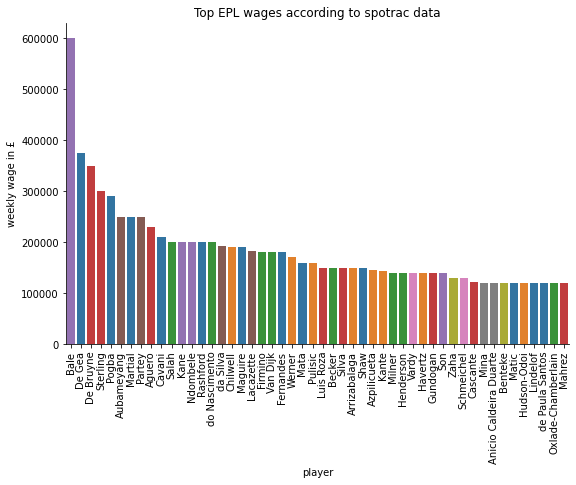

In [7]:
clrs_dict = dict(zip(df.head(50)['team'].value_counts().keys(),sns.color_palette()))
clrs = [clrs_dict[k] for k in df.head(50)['team']]

g = sns.catplot(data=df.head(50), kind='bar', x='player', y='weekly', palette=clrs)
g.ax.set_title('Top EPL wages according to spotrac data')
g.fig.set_figwidth(10)
g.fig.set_figheight(5)
plt.ylabel('weekly wage in £')
plt.xticks(rotation=90)
pass

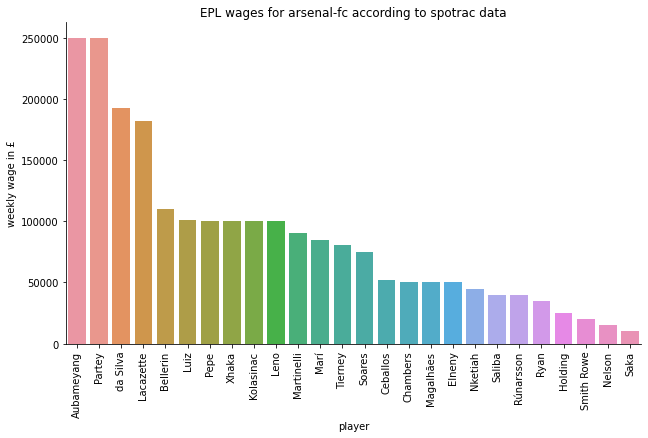

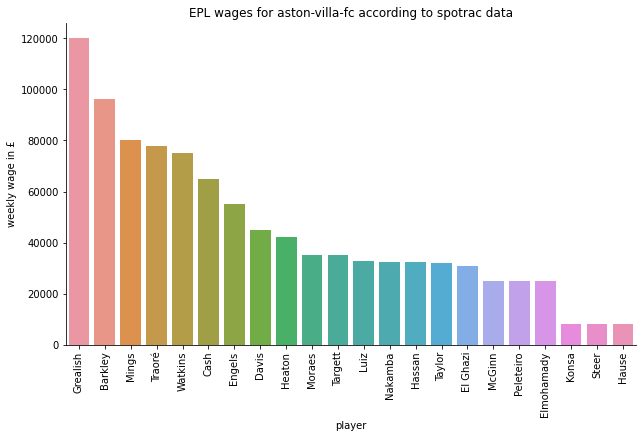

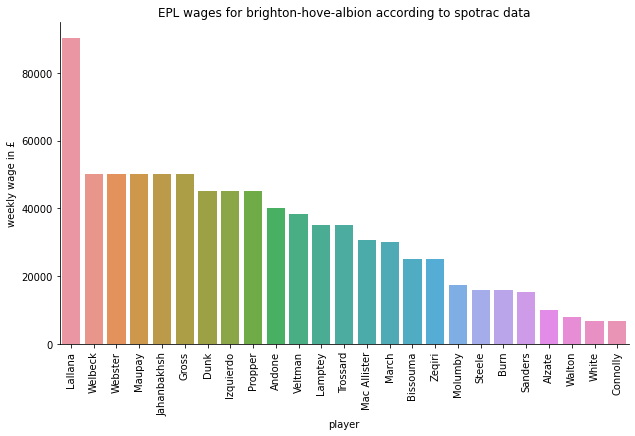

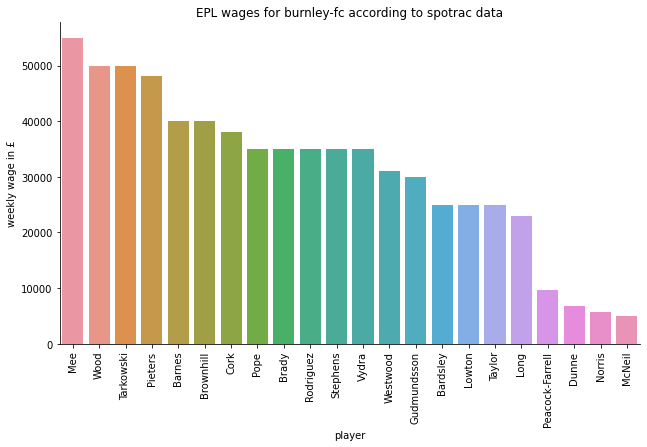

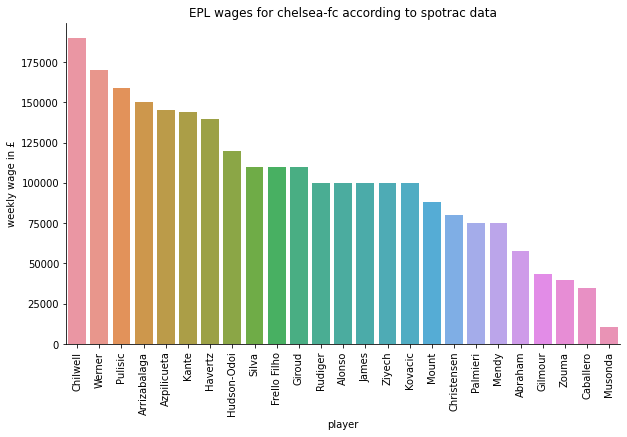

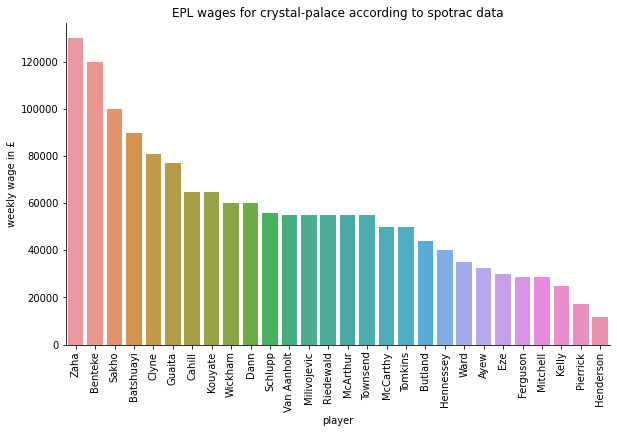

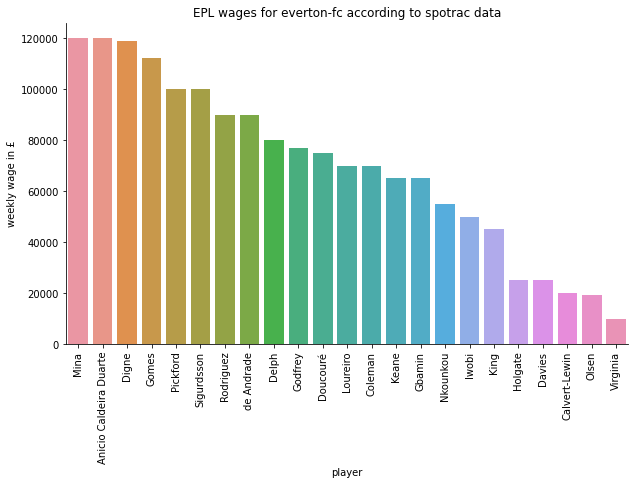

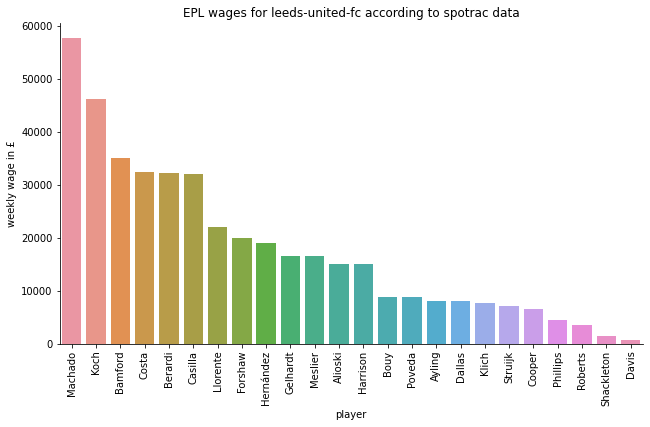

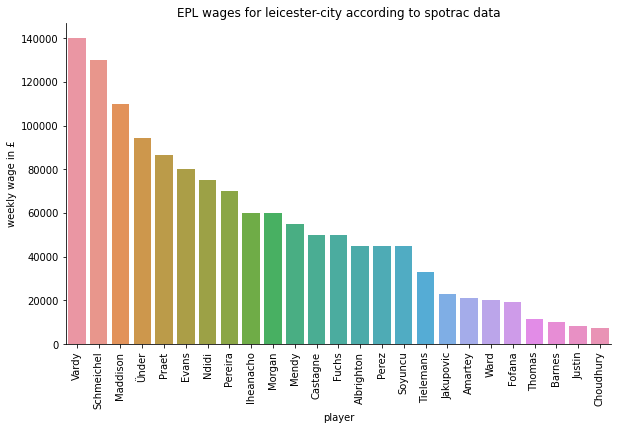

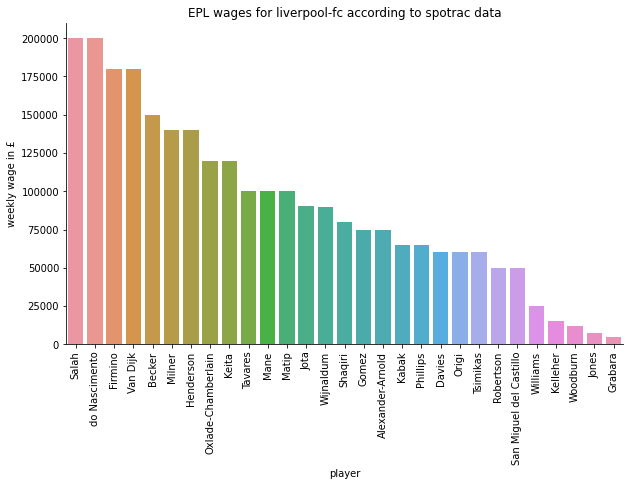

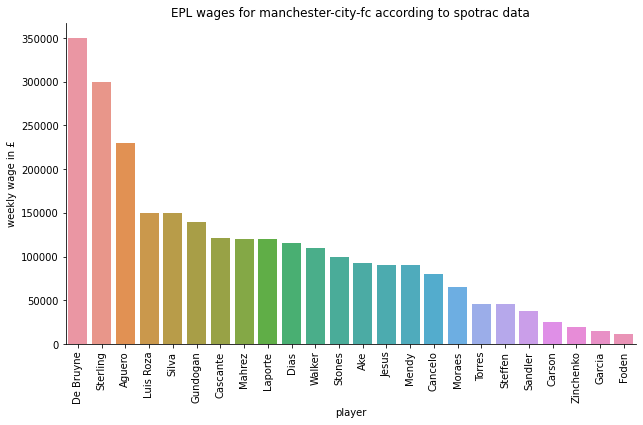

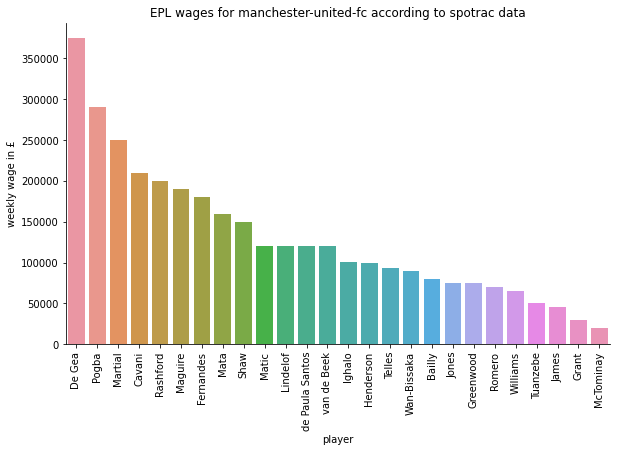

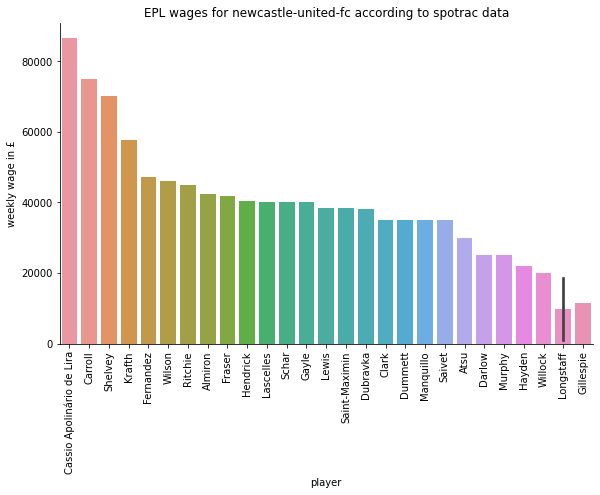

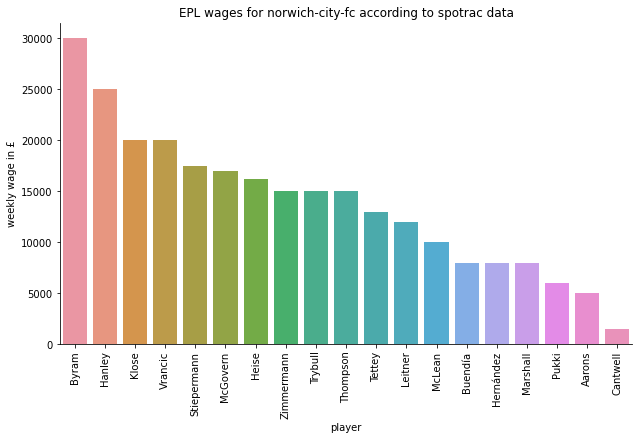

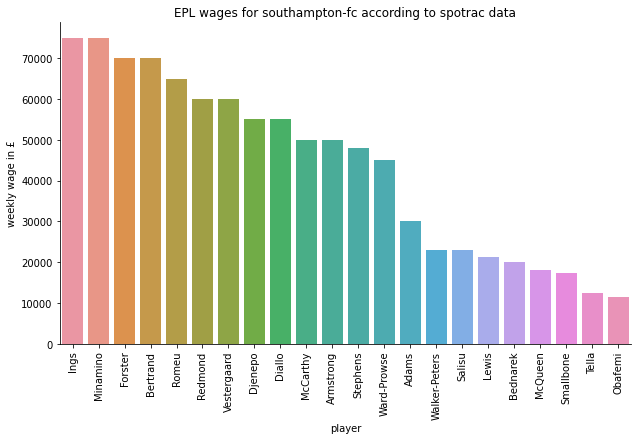

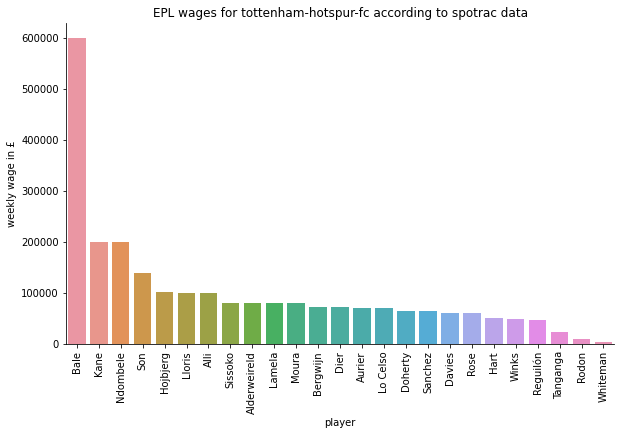

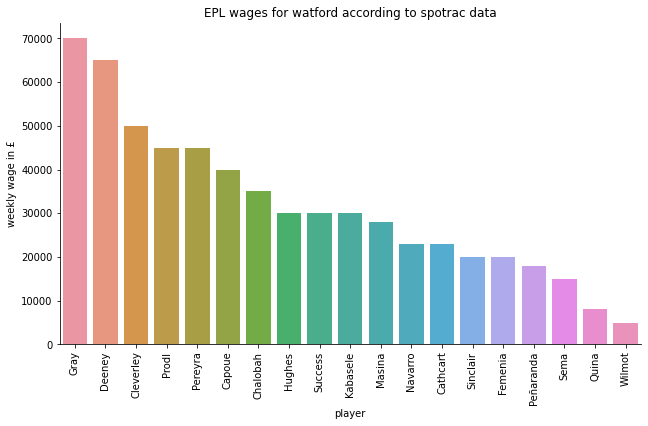

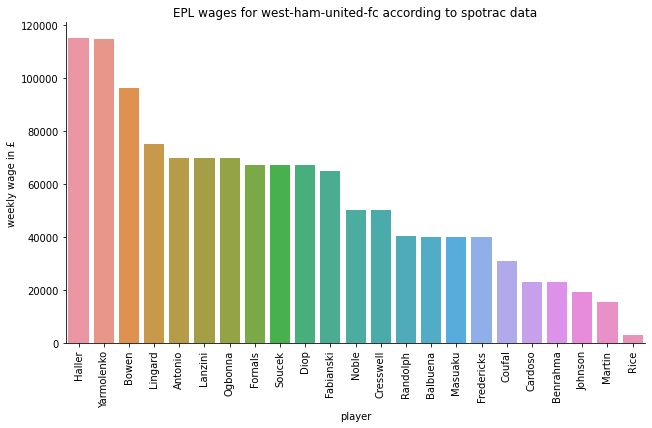

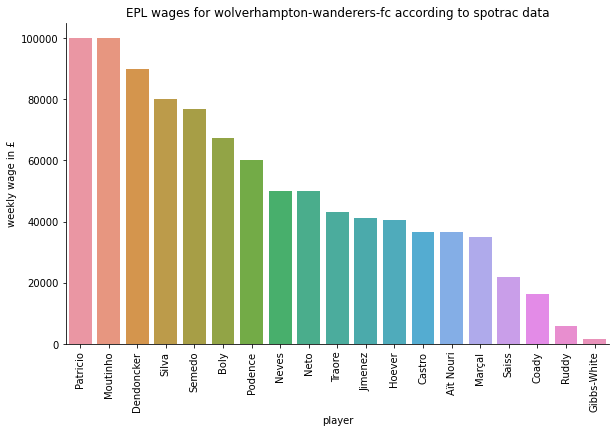

In [8]:
for team in teams:
    g = sns.catplot(data=df[df.team==team], kind='bar', x='player', y='weekly')
    g.ax.set_title(f'EPL wages for {team} according to spotrac data')
    g.fig.set_figwidth(10)
    g.fig.set_figheight(5)
    plt.ylabel('weekly wage in £')
    plt.xticks(rotation=90)